## 作业目录
### 1.单变量线性回归
#### 1.1 导入数据
#### 1.2 查看数据及其特征
#### 1.3 定义线性回归的代价函数
#### 1.4 数据预处理
#### 1.5 设置权重向量 w
#### 1.6 计算代价函数
### 2.Batch Gradient Decent（批量梯度下降）
#### 2.1 实现批量梯度下降算法
#### 2.2 初始化变量
#### 2.3 运行梯度下降算法
#### 2.4 计算训练模型的代价函数(误差)
#### 2.5 绘制线性模型并显示数据，查看拟合效果
### 3.多变量线性回归
#### 3.1 加载数据集
#### 3.2 特征标准化
#### 3.3 数据预处理并运行线性回归程序
#### 3.4 计算模型的代价(误差)
#### 3.5 查看训练进程
#### 3.6 使用scikit-learn的实现线性回归
### 4.L2正则化
### 5.L1正则化
### 6.调参
### 7. 最小二乘法(LSM)

刘佳辰 2021301525

In [199]:
# 例：导入函数库，并进行相关设置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [200]:
#1.1 使用 pandas 库函数读取 regress_data1.csv 文件内的数据，将读入的数据命名为 data、
data  = pd.DataFrame(pd.read_csv("regress_data1.csv"))

In [201]:
# 1.2 （1）使用 data.head()查看导入的数据
#     （2）使用 data.describe() 查看数据特征
#     （3）根据读入的数据绘制散点图，x轴为"人口"，y轴为"收益"，
#          需要将标签转移成水平方向，所有字体的大小设置为18

In [202]:
# 1.2.(1)使用 data.head()查看导入的数据
data.head()


,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [203]:
# 1.2.(2)使用 data.describe() 查看数据特征
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


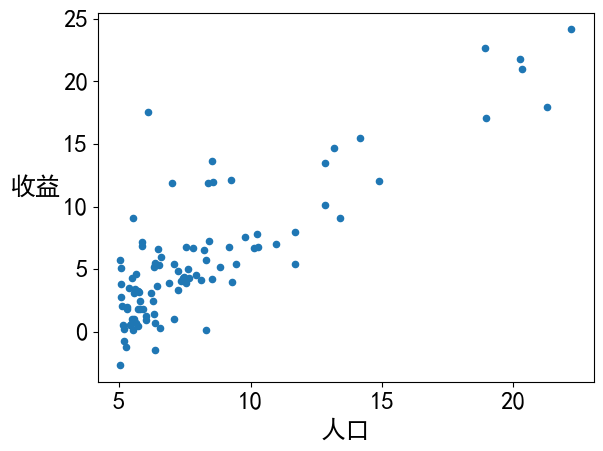

In [204]:
# 1.2.(3)根据读入的数据绘制散点图，x轴为"人口"，y轴为"收益"，
ax = data.plot.scatter(x="人口",y="收益")
plt.xlabel("人口",fontsize = 18)
plt.ylabel("收益",fontsize = 18,rotation = 0,labelpad = 20)
ax.tick_params(axis="both",labelsize = 18)

In [205]:
# 1.3 定义线性回归的代价函数
def computeCost(X, y, w):
    """
    计算线性回归模型的代价函数。
    参数：
    X -- 特征矩阵，形状为 (n_samples, n_features)
    y -- 标签向量，形状为 (n_samples,1)
    w -- 权重向量，形状为 (n_features,1)

    返回值：
    代价函数的值
    """
    inner = np.power(X @ w - y, 2)  # 计算预测值与实际值之差的平方和
    return np.sum(inner) / (2 * len(X))  # 对平方和进行求和并除以样本数量的两倍，得到代价函数的值

In [206]:
#1.4.(1)将一列名为'Ones'的值全为1的列插入到 data 的第一列位置
data.insert(0,"One",1)

In [207]:
#1.4.(2)获取 data 的列数
column = data.shape[1]

In [208]:
#1.4.(3)获取除最后一列外的所有列作为特征矩阵X
X = data.iloc[:,:2]

In [209]:
#1.4.(4)获取最后一列作为目标变量y
y = data.iloc[3]

In [210]:
#1.4.(5)使用 head() 函数观察下 X (训练集) 和 y (目标变量)是否正确.


In [211]:
#1.4.(6)使用DataFrame类型数据的values属性将 X 和 y 转换为 Numpy 矩阵

In [212]:
y

One     1.0000
人口      7.0032
收益     11.8540
Name: 3, dtype: float64

In [213]:
#1.5 （1）使用 Numpy 初始化权重向量 w，w 的行数与 X 的列数相同，w 的列数为1，且要求初始时w的所有值为0
#    （2）查看 X、w和 y 的维度

In [214]:
#1.6 使用 computeCost 计算代价

In [215]:
# 2.1 实现批量梯度下降算法
def batch_gradientDescent(X, y, w, alpha, count):
    """
    批量梯度下降算法实现。

    参数：
    X -- 特征矩阵，形状为 (n_samples, n_features)
    y -- 标签向量，形状为 (n_samples,1)
    w -- 权重向量，形状为 (n_features,1)
    alpha -- 学习率
    count -- 迭代次数

    返回值：
    w -- 更新后的权重向量
    costs -- 每次迭代的代价函数值列表
    """
    # 初始化代价函数值列表
    costs = []

    # 对每个样本进行迭代
    for i in range(count):
        # 根据公式更新权重向量
        w = w - (X.T @ (X @ w - y)) * alpha / len(X)

        # 计算当前代价函数值并添加到列表中
        cost = computeCost(X, y, w)
        costs.append(cost)

        # 每隔100次迭代输出一次当前代价函数值
        if i % 100 == 0:
            print("在第{}次迭代中，cost的值是：{}。".format(i, cost))

    # 返回最终的权重向量和代价函数值列表
    return w, costs

In [216]:
#2.2 初始化学习率 alpha = 0.01 ，迭代次数 iter = 2000

In [217]:
#2.3 使用 batch_gradientDescent 函数获取更新后的权重向量 w 和 损失值数组 cost，并输出权重向量 w

In [218]:
#2.4 使用 computeCost 函数重新计算代价并输出

In [219]:
#2.5 绘制代价随迭代次数变化的折线图
#(1) 创建图形和轴对象
#(2) 绘制代价随迭代次数的变化曲线
#(3) 设置x轴和y轴标签，x轴为"迭代次数"，y轴为"代价"
#(4) 设置图标题为"误差和训练Epoch数"
#(5) 显示图形

In [220]:
#3.1 （1）使用pandas库读取 regress_data2.csv 内的数据，将读入的数据命名为 data2
#    （2）使用 head() 查看读入的数据

In [221]:
#3.2 对数据进行标准化 x =（x - x_mean）/x_std，随后使用head()查看标准化后的数据

In [222]:
#3.3 重复第1部分的预处理步骤，并对新数据集运行线性回归程序
#(1)添加一列全为1的列，在第一列处，且列名为"Ones"
#(2)设置X2（训练数据）和y2（目标变量），最后一列设置为目标变量y2，其余列设置为X2
#(3)将X2和y2转化为Numpy类型的数据，并设置权重向量w2，w2是大小(3,1)的权重向量，使用np.zeros()函数进行初始化
#(4)使用batch_gradientDescent函数在数据集上进行线性回归，并获取训练后的权重向量w2和损失值数组cost2

In [223]:
#3.4 使用 computeCost 计算模型代价（针对w2）

In [224]:
#3.5 查看训练进程（绘制代价随迭代次数变化的折线图）
#(1) 创建一个大小为 (12, 8) 的画布和坐标轴对象
#(2) 在坐标轴上绘制代价函数 cost2 随迭代次数 iters 的变化曲线，使用红色线条
#(3) 设置 x 轴标签为 "迭代次数",字体大小为 18
#(4) 设置 y 轴标签为 "代价",旋转角度为 0,字体大小为 18
#(4) 设置图表标题为 "误差和训练Epoch数",字体大小为 18
#(5) 显示图形

In [225]:
#3.6 使用scikit-learn的线性回归函数
#(1)从 sklearn.linear_model 库中导入线性回归模型 LinearRegression
#(2)创建线性回归模型对象
#(3)使用训练数据 X 和标签 y 对模型进行拟合
#(4)查看scikit-learn model的预测表现
#  1） 取特征矩阵 X 的第二列作为自变量 x
#  2） 使用模型对x进行预测，并将预测结果展平为一维数组 f
#  3） 创建画布和坐标轴对象
#  4） 在坐标轴上绘制预测值 f 随人口规模 x 的变化曲线，使用红色线条，并添加标签为"预测值"
#  5） 在坐标轴上绘制训练数据点的散点图，并添加标签为"训练数据"
#  6） 显示图例，并设置位置和字体大小（loc = 2,fontsize=18）
#  7） 设置 x 轴标签为"人口"，字体大小为18
#  8） 设置 y 轴标签为"收益"，旋转角度为0，字体大小为18
#  9） 设置图表标题为"预测收益和人口规模"，字体大小为18
#  10）显示图表

In [226]:
#4 L2正则化
#（1）从 sklearn.linear_model 导入岭回归模型 Ridge
#（2）使用 Ridge 创建模型
#（3）对X和y使用 Ridge的fit()函数更新模型的参数
#（4）重复3.5(4)中的步骤，绘制图表：
#  1） 取特征矩阵 X 的第二列作为自变量 x
#  2） 使用模型对x进行预测，并将预测结果展平为一维数组 f
#  3） 创建画布和坐标轴对象
#  4） 在坐标轴上绘制预测值 f 随人口规模 x 的变化曲线，使用红色线条，并添加标签为"预测值Ridge"
#  5） 在坐标轴上绘制训练数据点的散点图，并添加标签为"训练数据"
#  6） 显示图例，并设置位置和字体大小（loc = 2,fontsize=18）
#  7） 设置 x 轴标签为"人口"，字体大小为18
#  8） 设置 y 轴标签为"收益"，旋转角度为0，字体大小为18
#  9） 设置图表标题为"预测收益和人口规模"，字体大小为18

In [227]:
#5 L1正则化
#（1）从 sklearn.linear_model 导入回归模型 Lasso
#（2）使用 Lasso 创建模型
#（3）对X和y使用 Lasso的fit()函数更新模型的参数
#（4） 重复4(4)中的步骤，绘制图表：
#  1） 取特征矩阵 X 的第二列作为自变量 x
#  2） 使用模型对x进行预测，并将预测结果展平为一维数组 f
#  3） 创建画布和坐标轴对象
#  4） 在坐标轴上绘制预测值 f 随人口规模 x 的变化曲线，使用红色线条，并添加标签为"预测值Lasso"
#  5） 在坐标轴上绘制训练数据点的散点图，并添加标签为"训练数据"
#  6） 显示图例，并设置位置和字体大小（loc = 2,fontsize=18）
#  7） 设置 x 轴标签为"人口"，字体大小为18
#  8） 设置 y 轴标签为"收益"，旋转角度为0，字体大小为18
#  9） 设置图表标题为"预测收益和人口规模"，字体大小为18

In [228]:
#6 调参
#（1）从 sklearn.linear_model 导入 cross_val_score
#（2）使用 np.logspace 定义一组不同的alpha值，要求从0.001（1e-3）到100（1e2）生成均匀的50个数值
#（3）初始化一个空列表 test_scores，用于存储测试分数
#（4）遍历每个alpha值，做以下事情：
#  1）创建一个Ridge回归模型，设置alpha值
#  2）使用交叉验证计算负均方误差的平方根，交叉验证的折数为5，所得分数记为 test_score
#  3) 对 test_score取平均数，存入test_scores
#（5）根据 alpha 和 test_scores绘制折线图，并将标题设置为"Alpha vs CV Error"

In [229]:
#7 最小二乘法（LSM）
#（1）实现LSM算法
def LSM(X, y):
    # 计算矩阵X的转置与X相乘，再求逆矩阵，最后将结果与X的转置相乘，再与向量y相乘，得到权重w
    w = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return w
#（2）对X和y使用LSM算法，获得最终的参数final_w2
#（3）输出final_w2和w，进行对比